<a href="https://colab.research.google.com/github/GildasTaliah/MeanVarianceOptimz/blob/main/EuroIndicesAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EURO INDICES ANALYTICS**

**INTRO**

In this brief project we will embark on performing data analytics on the VSTOXX, EURO STOXX Indices.

In the United States, the Dow Jones Industrial Average is one of the most widely watched stock market indices, created of course by Dow Jones company. In Europe, one such company is STOXX Limited. As an index provider, it develops, maintains, distributes, and markets over 7,000 indices that are known to be strictly rule-based and transparent.

Many of STOXX's products and derivatives trade on the Eurex, the derivatives Exchange in Frankfurt Germany.

The EURO STOXX 50 Index, with ticker Symbol SX5E, is one of the most
liquid stock indexes worldwide made up of 50 blue-chip stocks from the 12 Eurozone countries: Austria, Belgium, Finland, France, Germany, Greece, Ireland, Italy, Luxembourg, the Netherlands, Portugal, and Spain. Recalculation of the index typically takes place every 15 seconds.

The VSTOXX or EURO STOXX 50 Volatility, with ticker symbol VT2X, measures the implied market volatility over the next 30 days on the EURO STOXX 50 Index. Like VSTOXX, the Volatility Index (VIX) measures the short-term volatility implied by S&P 500 stock index option prices.

**Guideline**
- Intro
- Data analysis and Visualization
- Correlation and Regression Analysis
- Mean Variance Optimization

- Below is Python codes to enable downloading of the required data text files onto a destination directory defined by the **data_folder** variable.

In [55]:
import os
import urllib

# Index file location - Url
url_path =  'http://www.stoxx.com/download/historical_values/'

stoxxeu600_url = url_path + 'hbrbcpe.txt'
vstoxx_url = url_path + 'h_vstoxx.txt'

# Create local folder to save files
data_folder = 'data/'     # Save to this folder
# Check if local target exist
print(os.makedirs(data_folder, exist_ok = True))

# Create file paths - filepath
stoxxeu600_filepath = os.path.join(data_folder, "stoxxeu600.txt")
vstoxx_filepath = os.path.join(data_folder, "vstoxx.txt")

None


In [56]:
# Custom headers to mimic browser request
''' The custome headerds are important for successful download '''
headers = {
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
  }

# Function to download files headers
def download_file(url, filepath):
  try:
    req = urllib.request.Request(url, headers = headers)
    with urllib.request.urlopen(req) as response, open(filepath, 'wb') as outfile:
      outfile.write(response.read())
    print(f"Downloaded {url} to {filepath}")
  except Exception as e:
    print(f"Failed to download {url}: {e}")


# Now connect to API, and download file to file path
download_file(stoxxeu600_url, stoxxeu600_filepath)
download_file(vstoxx_url, vstoxx_filepath)

Downloaded http://www.stoxx.com/download/historical_values/hbrbcpe.txt to data/stoxxeu600.txt
Downloaded http://www.stoxx.com/download/historical_values/h_vstoxx.txt to data/vstoxx.txt


In [57]:
# Confirm files exist
print(os.path.isfile(stoxxeu600_filepath))

os.path.isfile(vstoxx_filepath)

True


True

- Proceed to make indices data readily available for **financial data analytics**.

In [58]:
# Read headlines for stoxxx
with open(stoxxeu600_filepath, 'r') as opened_file:
    for i in range(5):
        print(opened_file.readline())

Price Indices - EURO Currency

Date    ;Blue-Chip;Blue-Chip;Broad    ; Broad   ;Ex UK    ;Ex Euro Zone;Blue-Chip; Broad

        ;  Europe ;Euro-Zone;Europe   ;Euro-Zone;         ;            ; Nordic  ; Nordic

        ;  SX5P   ;  SX5E   ;SXXP     ;SXXE     ; SXXF    ;    SXXA    ;    DK5F ; DKXF

31.12.1986;775.00 ;  900.82 ;   82.76 ;   98.58 ;   98.06 ;   69.06 ;  645.26  ;  65.56



In [59]:
# After the view, we can now download easily
import pandas as pd
columns = ['Date', 'SX5P', 'SX5E', 'SXXP', 'SXXE',
              'SXXF', 'SXXA', 'DK5F', 'DKXF', 'EMPTY']
stoxxeu600 = pd.read_csv(stoxxeu600_filepath,
                    index_col=0,
                    parse_dates=True,
                    dayfirst=True,
                    header=None,
                    skiprows=4,
                    names=columns, sep=';'
                    )

In [60]:
# view data
stoxxeu600

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,EMPTY
Date,,,,,,,,,
1986-12-31,775.00,900.82,82.76,98.58,98.06,69.06,645.26,65.56,NaN
1987-01-01,775.00,900.82,82.76,98.58,98.06,69.06,645.26,65.56,NaN
1987-01-02,770.89,891.78,82.57,97.80,97.43,69.37,647.62,65.81,NaN
1987-01-05,771.89,898.33,82.82,98.60,98.19,69.16,649.94,65.82,NaN
1987-01-06,775.92,902.32,83.28,99.19,98.83,69.50,652.49,66.06,NaN
...,...,...,...,...,...,...,...,...,...
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27,NaN
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60,NaN
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26,NaN


In [61]:
# Delete empty column: EMPTY
del stoxxeu600['EMPTY']

In [62]:
# Save as csv for easy retrieval
stoxxeu600.to_csv('stoxxeu600.csv')

# Now read data
stoxxeu600 = pd.read_csv('stoxxeu600.csv', index_col=0, parse_dates=True)

# View info
stoxxeu600.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SX5P    7673 non-null   float64
 1   SX5E    7673 non-null   float64
 2   SXXP    7673 non-null   float64
 3   SXXE    7673 non-null   float64
 4   SXXF    7673 non-null   float64
 5   SXXA    7673 non-null   float64
 6   DK5F    7673 non-null   float64
 7   DKXF    7673 non-null   float64
dtypes: float64(8)
memory usage: 539.5 KB


In [63]:
# View head and tails
stoxxeu600

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
Date,,,,,,,,
1986-12-31,775.00,900.82,82.76,98.58,98.06,69.06,645.26,65.56
1987-01-01,775.00,900.82,82.76,98.58,98.06,69.06,645.26,65.56
1987-01-02,770.89,891.78,82.57,97.80,97.43,69.37,647.62,65.81
1987-01-05,771.89,898.33,82.82,98.60,98.19,69.16,649.94,65.82
1987-01-06,775.92,902.32,83.28,99.19,98.83,69.50,652.49,66.06
...,...,...,...,...,...,...,...,...
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26


# **Data Analysis and Visualization**

- Next, view the indices evolution.

                SX5P      SX5E      SXXP      SXXE      SXXF      SXXA  \
Date                                                                     
2016-10-04  3.704594  3.363047  4.181972  3.324508  4.195493  5.124819   

                 DK5F      DKXF  
Date                             
2016-10-04  14.276493  8.979713  



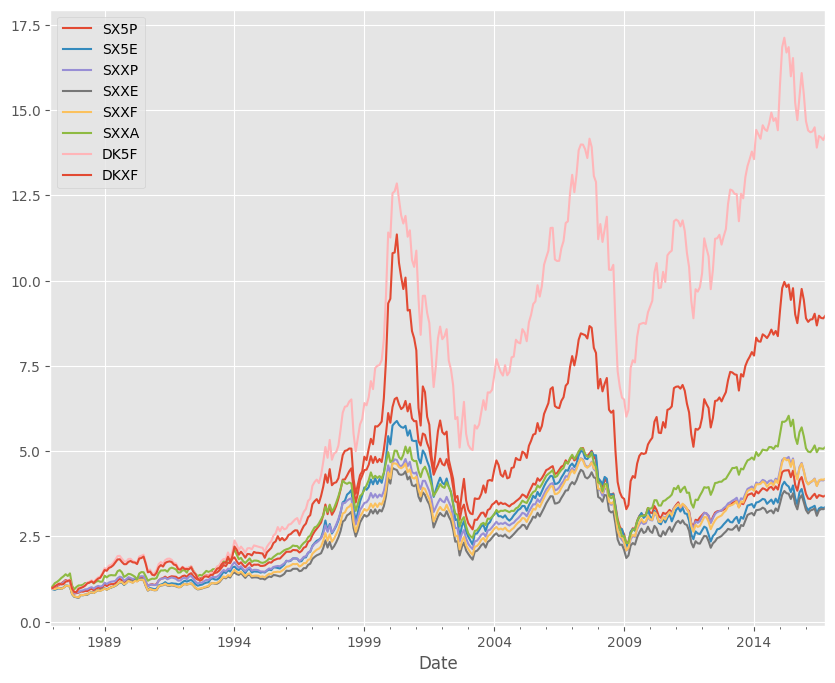

In [64]:
# @title View equity curve of indices
import matplotlib.pyplot as plt
plt.style.use('ggplot')


norm_stoxx = stoxxeu600.div( stoxxeu600.iloc[0])
print(norm_stoxx.last('1D') )
print()
norm_stoxx.resample('M').last().plot(subplots=False, figsize=(10, 8), grid=True)
plt.show()

In [65]:
# Compute correlation
stoxxeu600.pct_change().corr().style.format(precision=2).background_gradient(cmap = 'summer')

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
SX5P,1.00,0.97,0.99,0.97,0.98,0.97,0.89,0.88
SX5E,0.97,1.00,0.97,0.99,0.99,0.91,0.89,0.88
SXXP,0.99,0.97,1.00,0.98,0.99,0.98,0.91,0.90
SXXE,0.97,0.99,0.98,1.00,1.00,0.92,0.90,0.90
SXXF,0.98,0.99,0.99,1.00,1.00,0.93,0.92,0.91
SXXA,0.97,0.91,0.98,0.92,0.93,1.00,0.88,0.87
DK5F,0.89,0.89,0.91,0.90,0.92,0.88,1.00,0.98
DKXF,0.88,0.88,0.90,0.90,0.91,0.87,0.98,1.00


- We carry out same task for the volatility indices.

In [66]:
# Read headlines for Vsstoxx
with open(vstoxx_filepath, 'r') as opened_file:
    for i in range(5):
        print(opened_file.readline())

EURO STOXX 50 Volatility Indices,,,,,,,,,

 ,VSTOXX,Sub-Index 1M,Sub-Index 2M,Sub-Index 3M,Sub-Index 6M,Sub-Index 9M,Sub-Index 12M,Sub-Index 18M,Sub-Index 24M

Date,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8

04.01.1999,18.2033,21.2458,17.5555,31.2179,33.3124,33.7327,33.2232,31.8535,23.8209

05.01.1999,29.6912,36.6400,28.4274,32.6922,33.7326,33.1724,32.8457,32.2904,25.0532



In [67]:
# Download volatility indices data
vstoxx = pd.read_csv(vstoxx_filepath,
                    index_col=0,
                    parse_dates=True,
                    dayfirst=True,
                    header=2)

In [68]:
# Save as csv
vstoxx.to_csv('vstoxx.csv')
# now read data
vstoxx = pd.read_csv('vstoxx.csv')#index_col=0, parse_dates=True)#, dayfirst=True,   sep=',')

#adjust date to date and make it index
vstoxx['Date'] = pd.to_datetime(vstoxx['Date'])
vstoxx = vstoxx.set_index('Date')

# View info
vstoxx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V2TX    4357 non-null   float64
 1   V6I1    3906 non-null   float64
 2   V6I2    4357 non-null   float64
 3   V6I3    4296 non-null   float64
 4   V6I4    4357 non-null   float64
 5   V6I5    4357 non-null   float64
 6   V6I6    4340 non-null   float64
 7   V6I7    4357 non-null   float64
 8   V6I8    4343 non-null   float64
dtypes: float64(9)
memory usage: 340.4 KB


In [69]:
# View head and tail of data
vstoxx

,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8
Date,,,,,,,,,
1999-01-04,18.2033,21.2458,17.5555,31.2179,33.3124,33.7327,33.2232,31.8535,23.8209
1999-01-05,29.6912,36.6400,28.4274,32.6922,33.7326,33.1724,32.8457,32.2904,25.0532
1999-01-06,25.1670,25.4107,25.1351,32.2186,32.6459,31.9673,32.9260,33.2871,26.0107
1999-01-07,32.5205,35.4410,32.2004,36.1265,34.5150,33.1095,33.2843,33.7269,26.2205
1999-01-08,33.2296,35.8846,33.0020,36.0813,36.3964,33.4658,33.4837,33.9227,26.3672
...,...,...,...,...,...,...,...,...,...
2016-02-08,33.3917,34.7251,33.2189,31.8308,31.4783,30.6941,30.3705,29.8478,29.2559
2016-02-09,33.9664,35.7884,33.7800,32.6220,32.2459,31.5572,31.1659,30.5339,29.9000
2016-02-10,33.4528,34.6020,33.3637,32.1438,32.0018,31.2099,30.9937,30.8174,30.2533


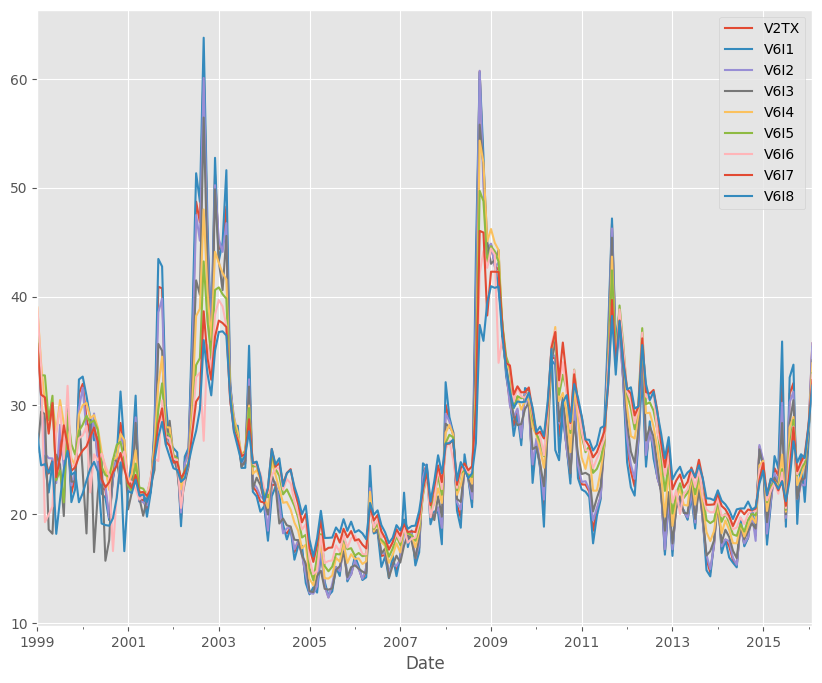

In [70]:
# plot monthly data
vstoxx.resample('M').last().plot(subplots=False, figsize=(10, 8), grid=True)
plt.show()

In [71]:
# Compute correlation
vstoxx.pct_change().corr().style.format(precision=4).background_gradient(cmap = 'summer')

,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8
V2TX,1.0000,0.6640,0.9487,0.4330,0.8544,0.7896,0.2728,0.5271,0.2637
V6I1,0.6640,1.0000,0.6070,0.3880,0.5537,0.5136,0.2588,0.3619,0.1962
V6I2,0.9487,0.6070,1.0000,0.4485,0.8713,0.8003,0.2903,0.5291,0.2718
V6I3,0.4330,0.3880,0.4485,1.0000,0.4466,0.4180,0.1490,0.2588,0.1077
V6I4,0.8544,0.5537,0.8713,0.4466,1.0000,0.8868,0.3441,0.6383,0.3093
V6I5,0.7896,0.5136,0.8003,0.4180,0.8868,1.0000,0.3419,0.6536,0.4280
V6I6,0.2728,0.2588,0.2903,0.1490,0.3441,0.3419,1.0000,0.2766,0.1997
V6I7,0.5271,0.3619,0.5291,0.2588,0.6383,0.6536,0.2766,1.0000,0.4675
V6I8,0.2637,0.1962,0.2718,0.1077,0.3093,0.4280,0.1997,0.4675,1.0000


-  Focus will be stationed on the two main indices: Euro Stoxx and it's

volatility index.  

In [72]:
# Market return data Stoxx
stoxxeu600_mrkret = pd.DataFrame( stoxxeu600.loc[:'2015'].pct_change().mean(axis = 1).rename('stoxxeu600_ret'))
stoxxeu600_mrkret['SX5P_ret'] = stoxxeu600['SX5P'].pct_change()
stoxxeu600_mrkret.dropna(inplace=True)
stoxxeu600_mrkret.describe()

,stoxxeu600_ret,SX5P_ret
count,7475.000000,7475.000000
mean,0.000306,0.000258
std,0.011833,0.012037
min,-0.078859,-0.091127
25%,-0.004901,-0.005342
50%,0.000676,0.000630
75%,0.005995,0.006131
max,0.094079,0.107591


In [73]:
# import warneings
import warnings
warnings.filterwarnings('ignore')

In [74]:
# Market returns data Vstoxx
vstoxx_mrkret = pd.DataFrame( vstoxx.loc[:'2015'].pct_change().mean(axis = 1).rename('vstoxx_ret'))
vstoxx_mrkret['V2TX_ret'] = vstoxx['V2TX'].pct_change()
vstoxx_mrkret.dropna(inplace=True)
vstoxx_mrkret.describe()

,vstoxx_ret,V2TX_ret
count,4326.000000,4326.000000
mean,inf,0.001772
std,NaN,0.060064
min,-0.175577,-0.278559
25%,-0.020387,-0.033866
50%,-0.001514,-0.004520
75%,0.019144,0.029570
max,inf,0.631089


In [75]:
# Join Vol to Equity index based on the index of vol
df_1 = pd.DataFrame(vstoxx['V2TX'])
df_2 = pd.DataFrame(stoxxeu600['SX5P'])
joined_df = df_1.join(df_2, how='inner')
joined_df = joined_df[['SX5P', 'V2TX']]

# rename
joined_df.columns = ['EUROSTOXX', 'VSTOXX']
joined_df

#
joined_ret = vstoxx_mrkret.join(stoxxeu600_mrkret, how='inner')

# Print the resulting DataFrame info
print(joined_df.info())

# Display the first few rows
joined_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4356 entries, 1999-01-04 to 2016-02-12
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EUROSTOXX  4356 non-null   float64
 1   VSTOXX     4356 non-null   float64
dtypes: float64(2)
memory usage: 102.1 KB
None


,EUROSTOXX,VSTOXX
Date,,
1999-01-04,3474.14,18.2033
1999-01-05,3535.30,29.6912
1999-01-06,3615.93,25.1670
1999-01-07,3566.02,32.5205
1999-01-08,3569.24,33.2296


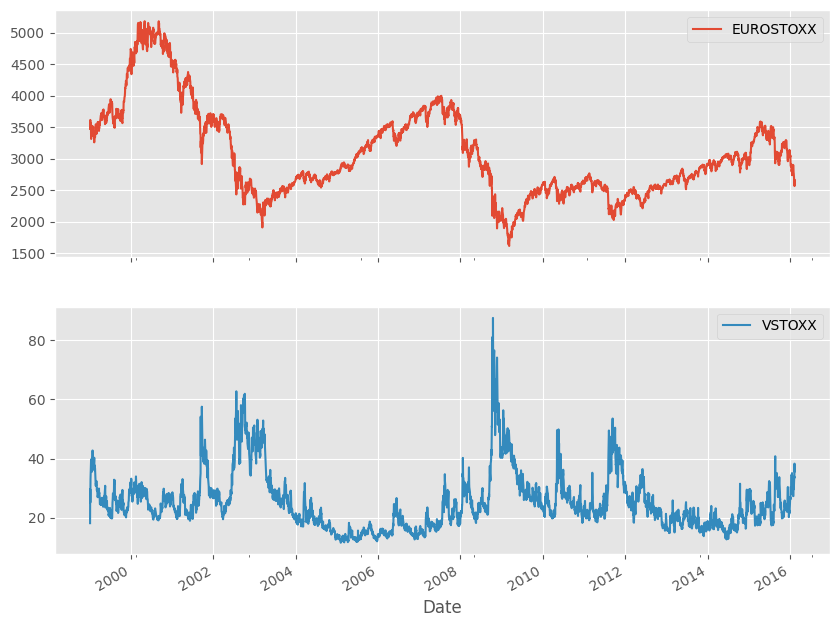

In [76]:
# Plot data: Evolution
import matplotlib.pyplot as plt
plt.style.use('ggplot')

joined_df.plot(subplots=True, figsize=(10, 8), grid=True)
plt.show()

- Notice some sort of divergent convergent trend in their relation. Basically trending in opposite direction mostly.

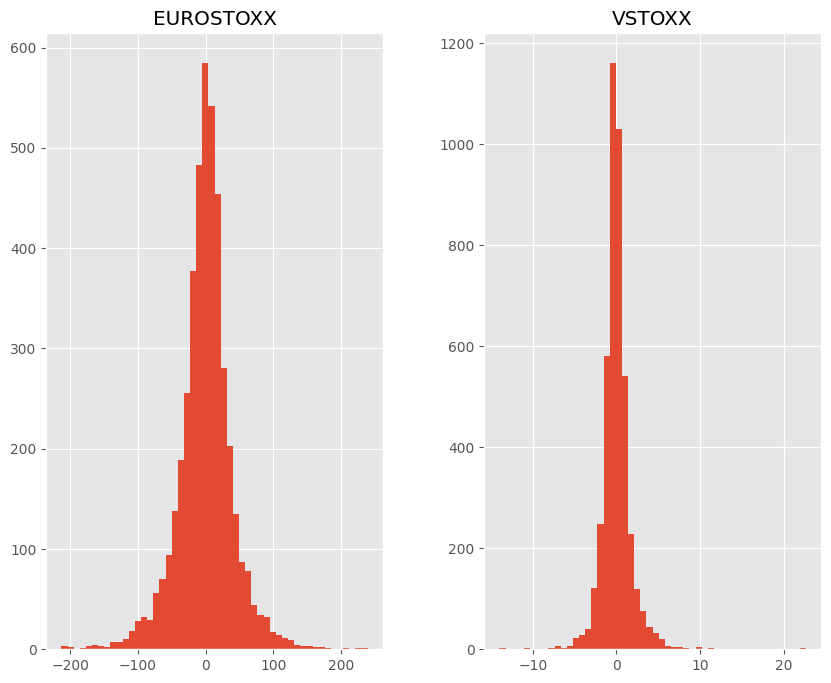

In [77]:
# Plot differences
joined_df.diff().hist(figsize=(10, 8), grid=True, bins = 50)
plt.show()

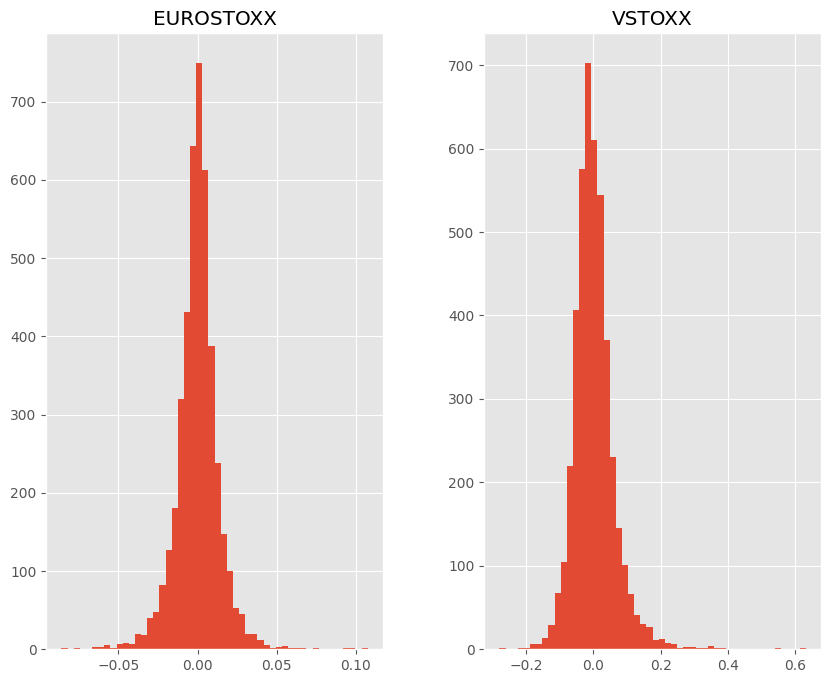

In [78]:
# plot hist of simple retunrns
joined_df.pct_change().hist(figsize=(10, 8), grid=True, bins = 50)
plt.show()

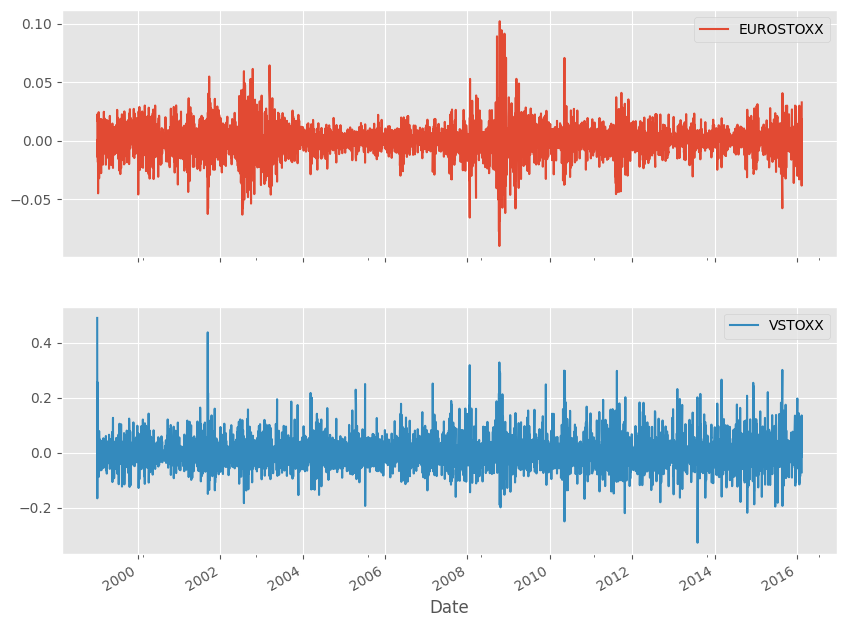

In [79]:
# Plot log returns
import numpy as np

log_rets = np.log( joined_df / joined_df.shift(1) ).dropna()
log_rets.plot(subplots = True, figsize=(10, 8), grid=True)
plt.show()

# **Correlation and causation analysis.**  

Correlation measures how two variables are linearly related. The value range from -1 to 1. Implying strong negative relationship to strong positive. Moreover -1 or +1, does not imply causation.

For causation, linear regression will be employed.

In [80]:
# Print correlation
joined_ret.corr().round(4).style.background_gradient(cmap = 'winter')

,vstoxx_ret,V2TX_ret,stoxxeu600_ret,SX5P_ret
vstoxx_ret,1.000000,0.889800,-0.694300,-0.674200
V2TX_ret,0.889800,1.000000,-0.714900,-0.697800
stoxxeu600_ret,-0.694300,-0.714900,1.000000,0.973200
SX5P_ret,-0.674200,-0.697800,0.973200,1.000000


In [81]:
log_rets.corr().round(4).style.background_gradient(cmap = 'winter')

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.709800
VSTOXX,-0.709800,1.000000


- At **-0.7098**, the EURO STOXX 50 Index is strongly negatively correlated with the VSTOXX.

In [82]:
# @title Examine causation
import statsmodels.api as sm

# Add constant
vstoxx_logrets = sm.add_constant(log_rets['VSTOXX'])

# Create and fit model
ols_fit = sm.OLS(log_rets['EUROSTOXX'], vstoxx_logrets).fit()
print(ols_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              EUROSTOXX   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     4420.
Date:                Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:55:23   Log-Likelihood:                 14124.
No. Observations:                4355   AIC:                        -2.824e+04
Df Residuals:                    4353   BIC:                        -2.823e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.684e-05      0.000     -0.257      0.7

- The slope coefficient of -0.1629 implies for every 1% increase in VSTOXX, the EUROSTOXX index is expected to decrease by 0.1629 %, on average, is quantitatively relevant. It's P-value of 0.000 implies the coefficient is statistically significant.

- R-Sqaured implies about 50.4% of the variation in EUROSTOXX is explained by the variation in VSTOXX. This is not an awful fit for the financial data.

- Jaque Berra test indicate non-normality of residuals, which might indicate potential issues with model assumptions. e.g there exist factors outside of VSSTOXX that account for variations in EUROSTOXX. However, Durbin watson with a value close to 2 suggests no significant autocorrelation, which is good.

Slope: -0.16293304538266354
Intercept: -3.684109316223643e-05
R-squared: 0.5038017056954912
P-value: 0.0
Standard Error: 0.0024508270112301223


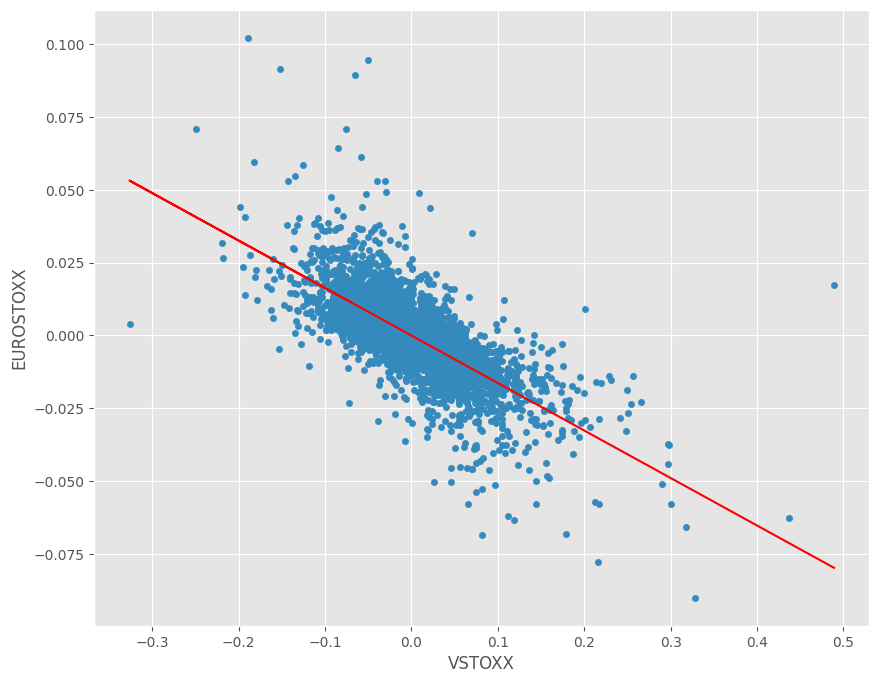

In [83]:
## Let us carry out same excercise with Scipy
# Scatter plot
log_rets.plot(kind='scatter', x='VSTOXX', y='EUROSTOXX', figsize=(10, 8), grid=True)

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(log_rets['VSTOXX'], log_rets['EUROSTOXX'])

# print
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("P-value:", p_value)
print("Standard Error:", std_err)

# fit values
fitted_values = slope * log_rets['VSTOXX'] + intercept

# Fit and plot the line
x = log_rets['VSTOXX']
y = log_rets['EUROSTOXX']
m, b = np.polyfit(x, y, 1)  # Linear regression
#plt.plot(x, m * x + b, color='red')
plt.plot(x, fitted_values, color='r')

# Show  plot
plt.show()

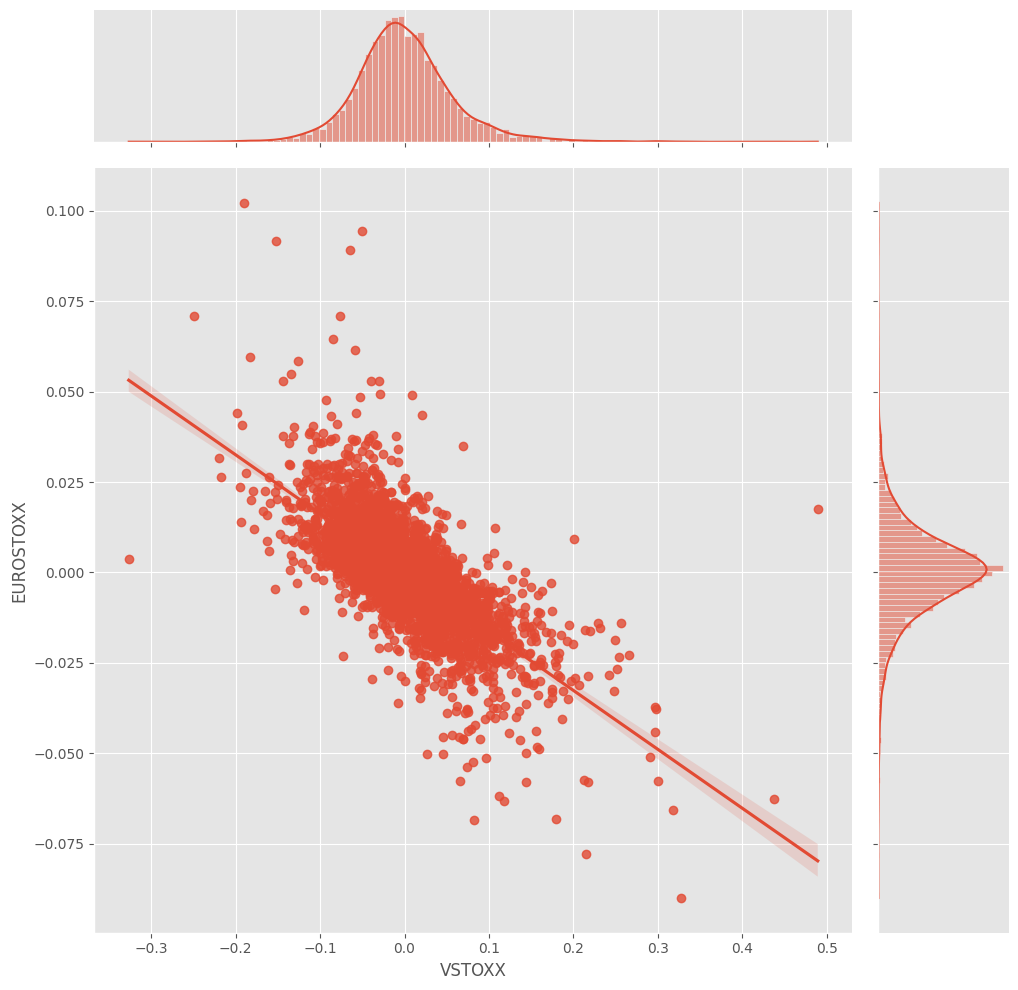

In [84]:
import seaborn as sns

# produce joint plots

sns.jointplot(x = x, y = y, kind = 'reg', height= 10,  );

Above we see the fitted values in straight line. The downward-sloping regression line, as shown in the preceding graph, confirms the negative correlation relationship between the EURO STOXX 50 and the VSTOXX indices.

- Let us examine the correlation on an annual rolling basis - rolling correlation.

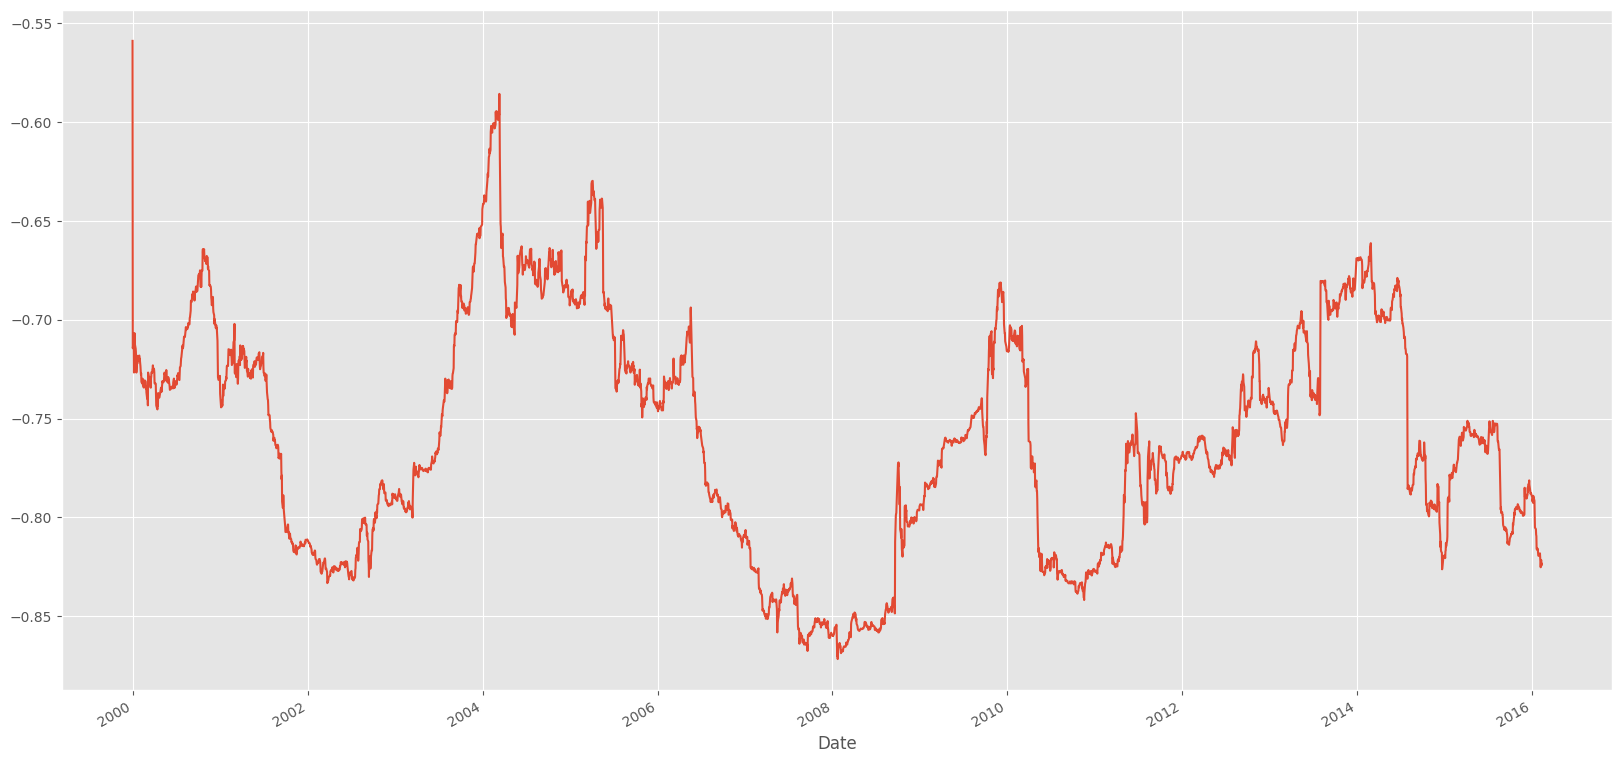

In [98]:
# Calculate rolling correlation between 'VSTOXX' and 'EUROSTOXX'
rolling_corr = log_rets['VSTOXX'].rolling(window=252).corr(log_rets['EUROSTOXX'])
rolling_corr.plot(figsize=(20, 10), grid=True)
plt.show()

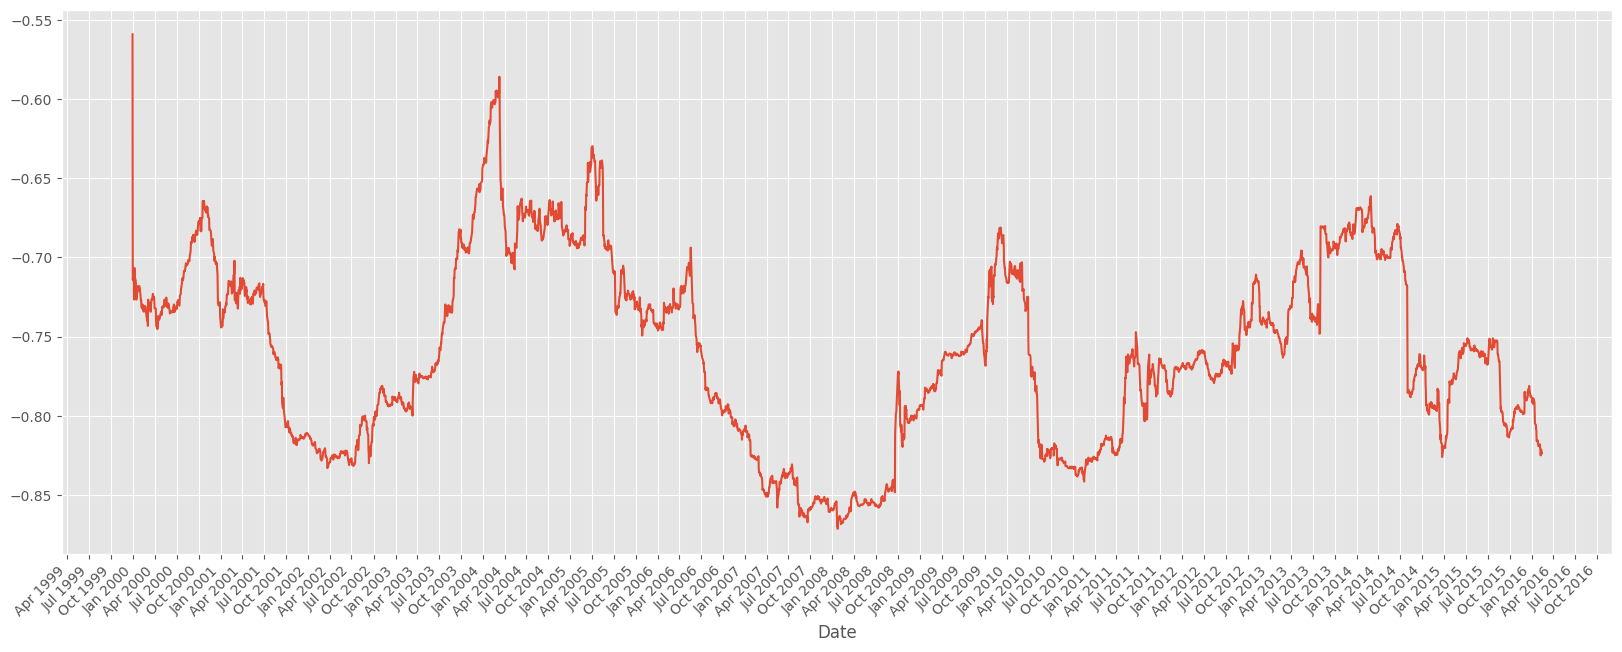

In [108]:
import matplotlib.dates as mdates

# Calculate rolling correlation
rolling_corr = log_rets['VSTOXX'].rolling(window=252).corr(log_rets['EUROSTOXX'])

# Plot
fig, ax = plt.subplots(figsize=(20, 8))
rolling_corr.plot(ax=ax, grid=True)

# Set x-axis to show quarters
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))  # Show ticks for Jan, Apr, Jul, Oct
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Jan 2025"

plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

- Across each year, on average the two indices seem to be more strongly negatively  correlated towards the edn of the year, except for: 2004, 2010, 2012 (somewhat).

- Also strongly negatively correlated during crisis period like in 2008.

$\,$
$\,$

# **Mean Variance Optimization**


The Mean Variance optimization, introduced by Markowitz, identifies efficient portfolios interms of their expected returns $\hat{\mu}$ and variances $\hat{\sigma}$.

The portfolio returns and variance is computed as follows:


\begin{align*}
\text{Portfolio return} = \mu_{p} = \sum_{i=1}^{N} w_i \mu_{i}   = w' \mu
\end{align*}


\begin{align*}
\text{Portfolio variance} = \sigma_{p} = \sqrt{w' \Sigma w}
\end{align*}



Where $w$ represents the weight vector. $\Sigma$ represents the asset returns covariance matrix. The objective of the Mean Variance framework is to minimize portfolio variance $\sigma_{p}$ subject to certain constraints.


Thus the portfolio selection problem considered in this project is formulated in the following way:

## MinVol


\begin{align*}
\underset{w}{\text{Min:}} \quad w' \Sigma w  \\
\text{s.t:} \quad \sum_{i=1}^{N} w_i = 1
\end{align*}

$$0.01 \leq w_i \leq 0.5$$

The optimization problem aims at minimizing the portfolios return variance, subject to the **budget constraint**, weights sum to $unity$ (indicating the portfolio is fully invested) and the **non-negativity constraints** indicates we do not allow for $short selling$.

## MaxSharpe

Similarly, when maximizing the Sharpe ratio, the budget constraint and the absence of short selling constraint will be considerd and the objective function switches from minimizing portfolio variance to maximizing portfolio Sharpe ratio (implemented as minimizing **-sharpeRatio**).


\begin{align*}
\text{Portfolio Sharpe ratio} = \frac{\mu_{p} - rf}{\sigma_{p}}
\end{align*}

- We will implement these concepts with the considered indices and evaluate the performances afterward.
- Below is a function to carry out this optimization task. We include equally weighted as benchmark strategy.


In [86]:

import scipy.optimize as sco
import numpy as np

def MinVolMaxSharpe(ret):

  '''
  Input: Takes in Stock Returns Matrix, computes the optimal weights for the
         given object functions: Min Vol and Max Sharpe.

  Output: return a weight matrix: Equally, Min Vol and Max Sharpe weights
  '''

  # Number of asset
  noa = len(ret.columns)

  # Initial weights: Equally weighted
  W = np.repeat(1/noa, noa)

  # Portfolio return, vol and sharpe ratio function
  def port_ret(W):
    return np.sum(ret.mean() * W) * 252


  def port_vol(W):
    return np.sqrt(np.dot(W.T,  np.dot(ret[ret < 0].cov() * 252, W)))

  def min_func_sharpe(W):
    return - (port_ret(W) - 0.025) /port_vol(W)

  # Budget and non-negativity contraints
  cons = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
  bnds = tuple((0.01, 0.5) for i in range(noa))

  # Minimizing the portfolio volatility: mv
  optmv = (sco.minimize(
          # objective function: OF
          port_vol,
          # Initial guess, which is the equal weight array: IW
          W,
          method = 'SLSQP', constraints= cons, bounds= bnds))
  mvW = optmv['x']
  mvret = port_ret(optmv['x'])
  mvvol = port_vol( optmv['x'])

  eqret = port_ret(W)
  eqvol = port_vol(W)
  print( )
  print(f'EquallyWReturns: {eqret * 100} Vol: {eqvol * 100}')
  print(f'MinVolReturns: {mvret * 100} Vol: {mvvol * 100}')


  # Maximizing the portfolio sharpe ratio: ms
  optms = (sco.minimize(
          # OF          # IW
          min_func_sharpe, W, method = 'SLSQP', constraints= cons,
                     bounds= bnds))
  msW = optms['x']
  msret = port_ret( optms['x'])
  msvol = port_vol(optms['x'])
  print(f'MaxSharpeReturns: {msret * 100} Vol: {msvol * 100}')

  dataW = pd.DataFrame({'EqualW': W,  'MinVolW': mvW, 'MaxShapW': msW})

  return dataW

- We use the years: 2011 until 2015 for test period. For each we use the previous data to obtain portfolio weights.

In [87]:
## In sample period until 2011
in_sample = stoxxeu600.loc['2001':'2011']
print(len(in_sample))
print()

# compute portfolio weights to be used for 2012
weights = MinVolMaxSharpe(in_sample.pct_change().dropna() )
weights.index = in_sample.columns
weights_all = weights

# Out sample returns 2012
out_sample = stoxxeu600.loc['2012']

# Calculate out-sample portfolio returns 2012
portRet_12 = pd.DataFrame(out_sample.pct_change().values @ weights )
portRet_12.index = out_sample.index
portRet_12.dropna(inplace= True)
print(len(portRet_12))



## In sample period until 2012
in_sample = stoxxeu600.loc['2001':'2012']
print(len(in_sample))
print()

# compute portfolio weights to be used for 2013
weights = MinVolMaxSharpe(in_sample.pct_change().dropna() )
weights.index = in_sample.columns
weights_all = pd.concat([weights_all, weights])

# Out sample returns 2013
out_sample = stoxxeu600.loc['2013']

# Calculate out-sample portfolio returns 2013
portRet_13 = pd.DataFrame(out_sample.pct_change().values @ weights )
portRet_13.index = out_sample.index
portRet_13.dropna(inplace= True)
print(len(portRet_13))





## In sample period until 2013
in_sample = stoxxeu600.loc['2001':'2013']
print(len(in_sample))
print()

# compute portfolio weights to be used for 2014
weights = MinVolMaxSharpe(in_sample.pct_change().dropna() )
weights.index = in_sample.columns
weights_all = pd.concat([weights_all, weights])

# Out sample returns 2014
out_sample = stoxxeu600.loc['2014']

# Calculate out-sample portfolio returns 2014
portRet_14 = pd.DataFrame(out_sample.pct_change().values @ weights )
portRet_14.index = out_sample.index
portRet_14.dropna(inplace= True)
print(len(portRet_14))




## In sample period until 2014
in_sample = stoxxeu600.loc['2001':'2014']
print(len(in_sample))
print()

# compute portfolio weights to be used for 2015
weights = MinVolMaxSharpe(in_sample.pct_change().dropna() )
weights.index = in_sample.columns
weights_all = pd.concat([weights_all, weights])

# Out sample returns 2015
out_sample = stoxxeu600.loc['2015']

# Calculate out-sample portfolio returns 2015
portRet_15 = pd.DataFrame(out_sample.pct_change().values @ weights )
portRet_15.index = out_sample.index
portRet_15.dropna(inplace= True)
print(len(portRet_15))

# Print weights
#print(weights_all)
# Now concat all returns
portRet = pd.concat([portRet_12, portRet_13 ,portRet_14, portRet_15 ])

2820


EquallyWReturns: -0.7805929549310741 Vol: 16.535226334838008
MinVolReturns: -0.4346185739581081 Vol: 15.578052620296148
MaxSharpeReturns: 1.7431702661591844 Vol: 18.482218158081473
256
3077


EquallyWReturns: 0.5228177142378292 Vol: 16.191130889608786
MinVolReturns: 0.7777394425738127 Vol: 15.216624094499476
MaxSharpeReturns: 3.049628218738829 Vol: 18.147571623807057
255
3333


EquallyWReturns: 1.7744832557688008 Vol: 15.900037220365085
MinVolReturns: 1.9268247776013758 Vol: 14.921127800176388
MaxSharpeReturns: 4.176670567907261 Vol: 17.85290879573068
255
3589


EquallyWReturns: 1.9899662992645561 Vol: 15.628174965790912
MinVolReturns: 2.2204075839284956 Vol: 14.671764461061432
MaxSharpeReturns: 4.295500937433921 Vol: 17.49873026880114
256


In [109]:
# Portfolio weights description
weights_all.describe().round(5)

,EqualW,MinVolW,MaxShapW
count,32.000,32.00000,32.00000
mean,0.125,0.12500,0.12500
std,0.000,0.17183,0.20295
min,0.125,0.01000,0.01000
25%,0.125,0.01000,0.01000
50%,0.125,0.01000,0.01000
75%,0.125,0.21317,0.11750
max,0.125,0.50000,0.50000


In [110]:
weights_all

,EqualW,MinVolW,MaxShapW
SX5P,0.125,0.010000,0.01
SX5E,0.125,0.010000,0.01
SXXP,0.125,0.248651,0.01
SXXE,0.125,0.010000,0.01
SXXF,0.125,0.201349,0.01
SXXA,0.125,0.500000,0.01
DK5F,0.125,0.010000,0.50
DKXF,0.125,0.010000,0.44
SX5P,0.125,0.010000,0.01
SX5E,0.125,0.010000,0.01


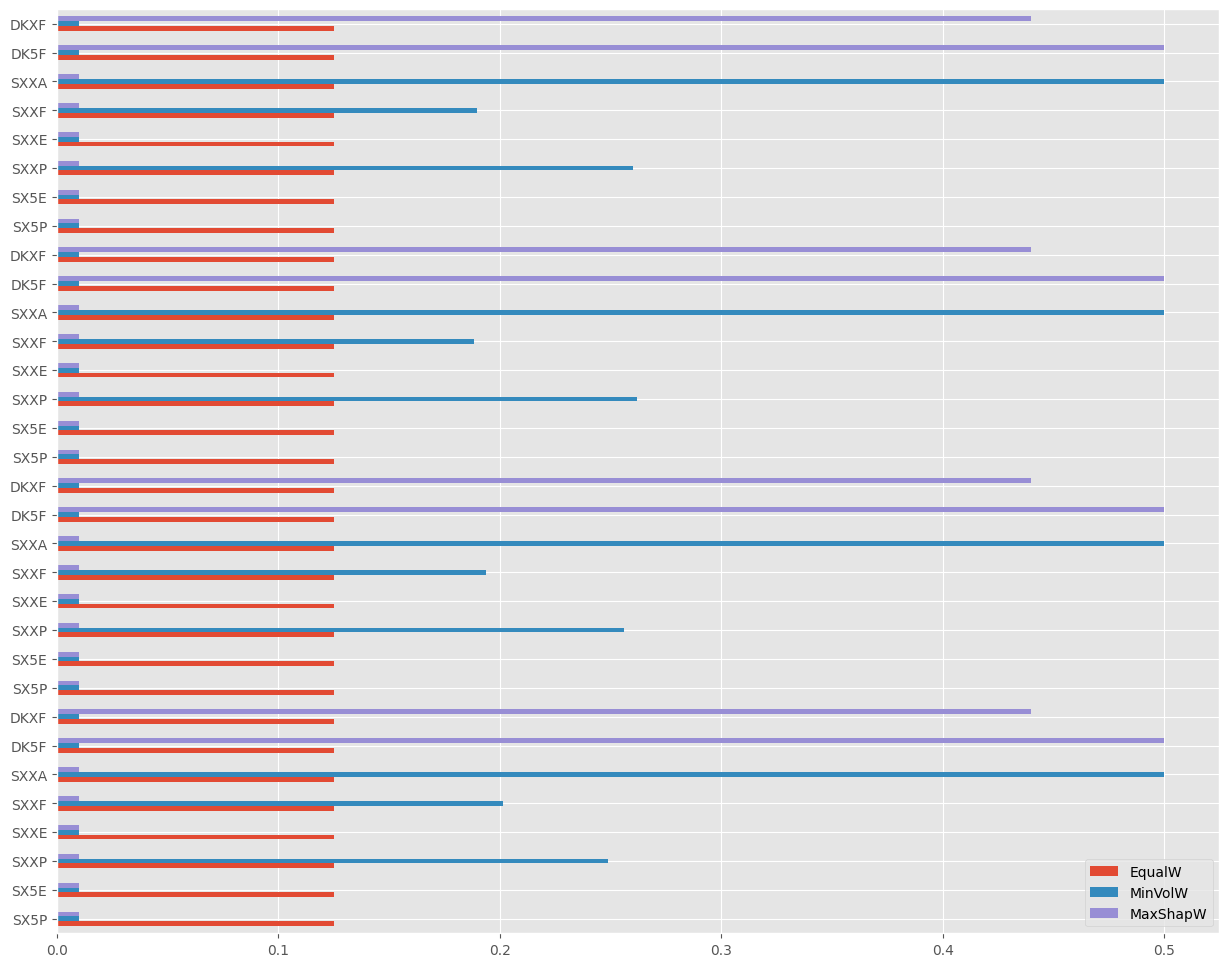

In [89]:
# Portfolio Weight evolution distribution
weights_all.plot(kind = 'barh', figsize=(15, 12), grid=True)
plt.show()

In [90]:
# Compute cumaltive product
cum_portRet = (portRet + 1).cumprod()

# View begining and final value
cum_portRet

,EqualW,MinVolW,MaxShapW
Date,,,
2012-01-03,1.013720,1.017467,1.014146
2012-01-04,1.004579,1.013619,1.003159
2012-01-05,0.998267,1.006336,1.007420
2012-01-06,0.997504,1.007939,1.008555
2012-01-09,0.993030,1.003623,1.004786
...,...,...,...
2015-12-24,1.465804,1.476457,1.536060
2015-12-28,1.457824,1.470617,1.528002
2015-12-29,1.480101,1.490790,1.550978


In [91]:
#  Function to compute (out-sample portfolio) performance metrics

def MaxDrawdown(returns: pd.DataFrame)-> float:
  """ Takes in portfolio return data, and computes maximum drawdown from peak to trough
  """
  cum_ret = (1 + returns).cumprod()
  cum_ret_max = cum_ret.cummax()
  max_drawdown = (cum_ret - cum_ret_max) / cum_ret_max

  return max_drawdown.min()

def perf_metrics(port_ret: pd.DataFrame, sig: float=0.05) -> list[float]:

  """ Takes in dailyly portfolio return df, and computes metrics.
  sig: the significance level for VaR and CVaR, defaul 5%
  """

  # Compute portfolio performance metrics
  ann_ret = np.nanmean(port_ret) * 252 * 100                     # annualized average returns
  vol = np.nanstd(port_ret) * np.sqrt(252) * 100                 # annualized volatility
  SR = ann_ret / vol                                            # Sharpe ratio
  geo_mean = (np.exp(np.log(1 + port_ret)).mean()) - 1          # geometric returns
  ann_gm = ((1 + geo_mean) ** len(port_ret) - 1 ) * 100         # annualized geometric returns
  #cumret = (np.exp(port_ret.sum()) - 1) * 100                  # cumulative returns same as Ann. Geo Returns
  d_vol = np.nanstd(port_ret[port_ret<0]) * np.sqrt(52) * 100   # annualized downside deviation
  MDD = MaxDrawdown(port_ret) * 100                             # maximum drawdown (daily)
  VaR = port_ret.quantile(sig)                                  # daily VaR
  CVaR = (port_ret[port_ret<=VaR].mean())                       # daily CVaR

  # Metrics
  metrs = [ann_ret, vol, SR, ann_gm, d_vol, MDD, VaR * 100, CVaR * 100]

  return metrs

In [92]:
data = stoxxeu600.loc['2011':'2015']
rets = np.log(data / data.shift(1) ).dropna()
print(rets.info())
met_rets = rets.apply(perf_metrics)
met_rets.index = ['Annz. Ret', 'Annz. Vol', 'Sharpe Ratio', 'Annz. G.Ret',   'Down_Vol', 'MaxDrawD', 'VaR_5%', 'CVaR_5%']
met_rets.style.format(precision=2).background_gradient(cmap = 'summer', axis=1)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1282 entries, 2011-01-04 to 2015-12-31
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SX5P    1282 non-null   float64
 1   SX5E    1282 non-null   float64
 2   SXXP    1282 non-null   float64
 3   SXXE    1282 non-null   float64
 4   SXXF    1282 non-null   float64
 5   SXXA    1282 non-null   float64
 6   DK5F    1282 non-null   float64
 7   DKXF    1282 non-null   float64
dtypes: float64(8)
memory usage: 90.1 KB
None


,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
Annz. Ret,3.44,2.76,5.39,4.20,5.43,6.39,5.03,5.88
Annz. Vol,16.58,21.58,16.86,19.99,17.91,15.40,19.26,19.33
Sharpe Ratio,0.21,0.13,0.32,0.21,0.30,0.41,0.26,0.30
Annz. G.Ret,19.11,15.08,31.57,23.82,31.81,38.40,29.15,34.87
Down_Vol,5.51,6.99,5.64,6.56,5.94,5.24,6.56,6.64
MaxDrawD,-27.77,-36.48,-27.29,-33.74,-30.07,-22.26,-31.59,-32.81
VaR_5%,-1.66,-2.29,-1.74,-2.09,-1.93,-1.54,-2.03,-2.02
CVaR_5%,-2.48,-3.19,-2.53,-2.99,-2.69,-2.32,-2.92,-2.95


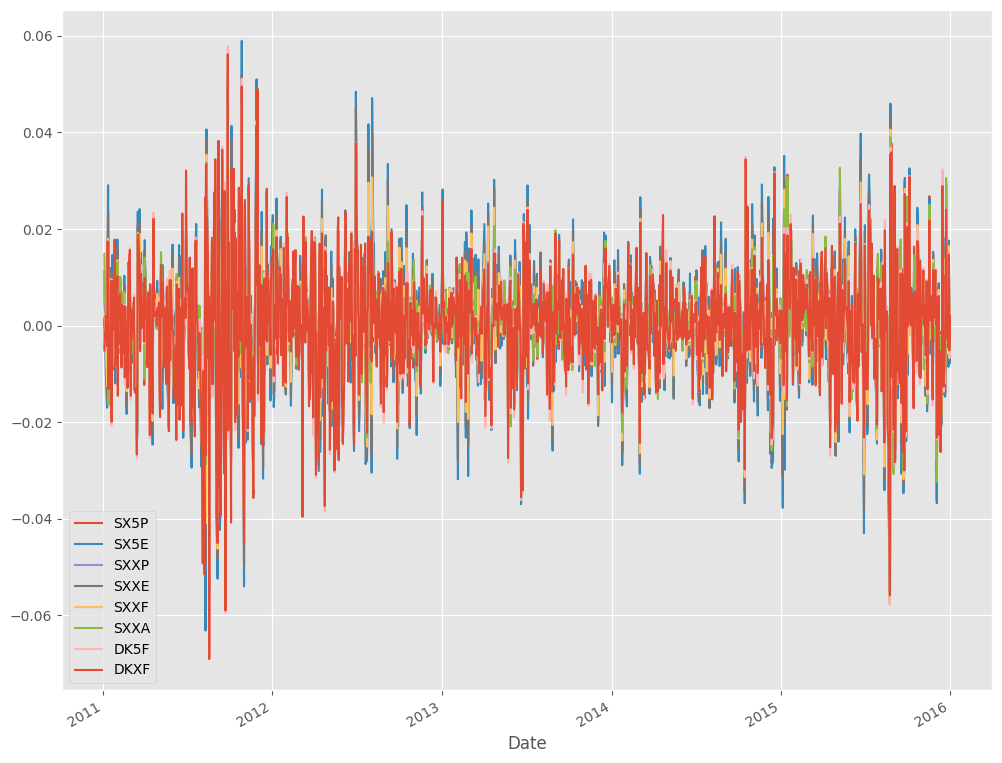

In [93]:
rets.plot( figsize=(12, 10), grid=True)
plt.show()

In [94]:
portRet.corr()

,EqualW,MinVolW,MaxShapW
EqualW,1.000000,0.985523,0.947606
MinVolW,0.985523,1.000000,0.920168
MaxShapW,0.947606,0.920168,1.000000


In [95]:
## Euro Indices returns
# Use color map summer on rows: green to yellow
#out_results =  {key: df.apply(perf_metrics).T for key, df in .items()}
out_results = portRet.apply(perf_metrics)
#out_results
out_results.index = ['Annz. Ret', 'Annz. Vol', 'Sharpe Ratio', 'Annz. G.Ret',   'Down_Vol', 'MaxDrawD', 'VaR_5%', 'CVaR_5%']
out_results.style.format(precision=2).background_gradient(cmap = 'summer', axis=1)

,EqualW,MinVolW,MaxShapW
Annz. Ret,10.68,10.68,12.07
Annz. Vol,15.76,14.68,16.42
Sharpe Ratio,0.68,0.73,0.73
Annz. G.Ret,54.18,54.21,63.12
Down_Vol,5.07,4.77,5.32
MaxDrawD,-18.55,-17.81,-18.55
VaR_5%,-1.63,-1.52,-1.70
CVaR_5%,-2.30,-2.14,-2.42


            EqualW      MinVolW     MaxShapW
count  1022.000000  1022.000000  1022.000000
mean      0.000424     0.000424     0.000479
std       0.009934     0.009254     0.010348
min      -0.053569    -0.053754    -0.055156
25%      -0.004645    -0.004206    -0.004864
50%       0.000605     0.000621     0.000711
75%       0.005696     0.005162     0.006197
max       0.041241     0.040789     0.037650



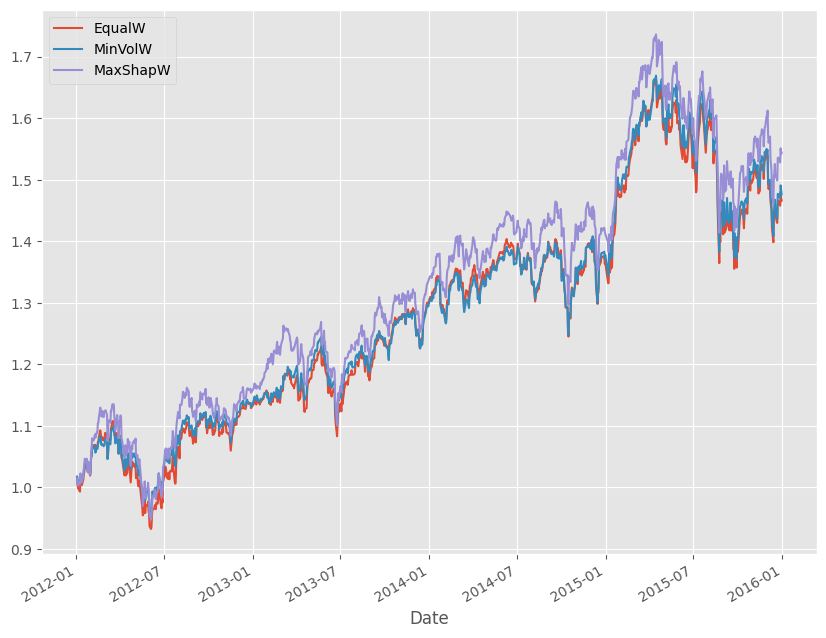

In [96]:
print(portRet.describe())
print()
cum_portRet.plot( figsize=(10, 8), grid=True)
plt.show()

              EqualW   MinVolW  MaxShapW
Date                                    
2012-01-03  1.013815  1.017620  1.014247
2012-01-04  1.004714  1.013779  1.003318
2012-01-05  0.998420  1.006521  1.007588
2012-01-06  0.997658  1.008125  1.008724
2012-01-09  0.993193  1.003818  1.004962
...              ...       ...       ...
2015-12-24  1.541474  1.542406  1.622418
2015-12-28  1.533104  1.536317  1.613929
2015-12-29  1.556711  1.557537  1.638381
2015-12-30  1.547257  1.549699  1.628601
2015-12-31  1.541908  1.542265  1.631362

[1022 rows x 3 columns]


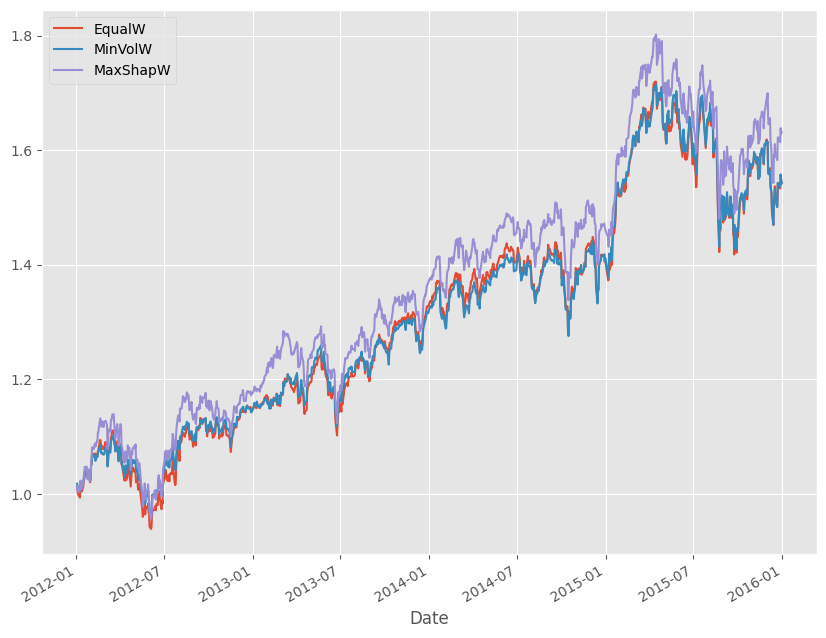

In [97]:
cum_exp = portRet.cumsum().apply(np.exp)
print(cum_exp )
cum_exp.plot( figsize=(10, 8), grid=True)
plt.show()

The strategy performance do not significantly differ. In the future other strategies will be tested.

In [111]:
# The End!